In [287]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import matplotlib.pyplot as plt

%matplotlib inline

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [288]:
iris_df = pd.read_csv("Iris.csv")

iris_df.sample(n = 10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
127,6.1,3.0,4.9,1.8,Iris-virginica
84,5.4,3.0,4.5,1.5,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [289]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [290]:
#iris_df.isnull().any()

<HTML>
    <BODY>
        <font color="red">
            As per info method on the dataset, there are no null/missing values. Hence, no need to replace any cell with estimated values.
        </font>
    </BODY>
</HTML>

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

<HTML>
    <BODY>
        <font color="red">
            The classes of columns 0to2 are already float (classified as 'approximate numeric data type'), which is a numerical type. Therefore, no need of explicit type casting.
        </font><br>
        <font color="green">
            However, if required, we can use the pd.to_numeric(iris_df[column_name])
        </font>
    </BODY>
</HTML>

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [291]:
# Convert Class column values to nominals
iris_df['Class'] = iris_df['Class'].replace({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2})

iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [292]:
correlation = iris_df.corr()

print('Correlation of Class with different features is:')
correlation.iloc[0:4, 4]

Correlation of Class with different features is:


Sepal Length (in cm)   -0.460039
Sepal Width in (cm)     0.612165
Petal length (in cm)   -0.649101
Petal width (in cm)    -0.580749
Name: Class, dtype: float64

<HTML>
    <BODY>
        <font color="red">
            As none of the coorelations of the target column (Class) with independent variables lie between -0.1 to +0.1, therefore, no need to drop any feature.
        </font>
    </BODY>
</HTML>

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [293]:
cov_sepL_class = np.cov(iris_df['Sepal Length (in cm)'], iris_df['Class'])
cov_sepW_class = np.cov(iris_df['Sepal Width in (cm)'], iris_df['Class'])
cov_petL_class = np.cov(iris_df['Petal length (in cm)'], iris_df['Class'])
cov_petW_class = np.cov(iris_df['Sepal Width in (cm)'], iris_df['Class'])

print('Covariance of sepLength against class: ')
print(cov_sepL_class[0,1])
print('---***---')

print('Covariance of sepWidth against class:')
print(cov_sepW_class[0,1])
print('---***---')

print('Covariance of petLength against class: ')
print(cov_petL_class[0,1])
print('---***---')

print('Covariance of petWidth against class: ')
print(cov_petW_class[0,1])
print('---***---')

Covariance of sepLength against class: 
-0.3120805369127518
---***---
Covariance of sepWidth against class:
0.21744966442953023
---***---
Covariance of petLength against class: 
-0.9382550335570469
---***---
Covariance of petWidth against class: 
0.21744966442953023
---***---


<HTML>
    <BODY>
        <font color="red">
            The absolute covariance of each independent variable against the target variable is > 0.1, therefore, each of the independent variable has considerable affect on the target and, therefore, no need to drop any of them
        </font>
    </BODY>
</HTML>

## Question 6

*Plot the scatter matrix for all the variables.*

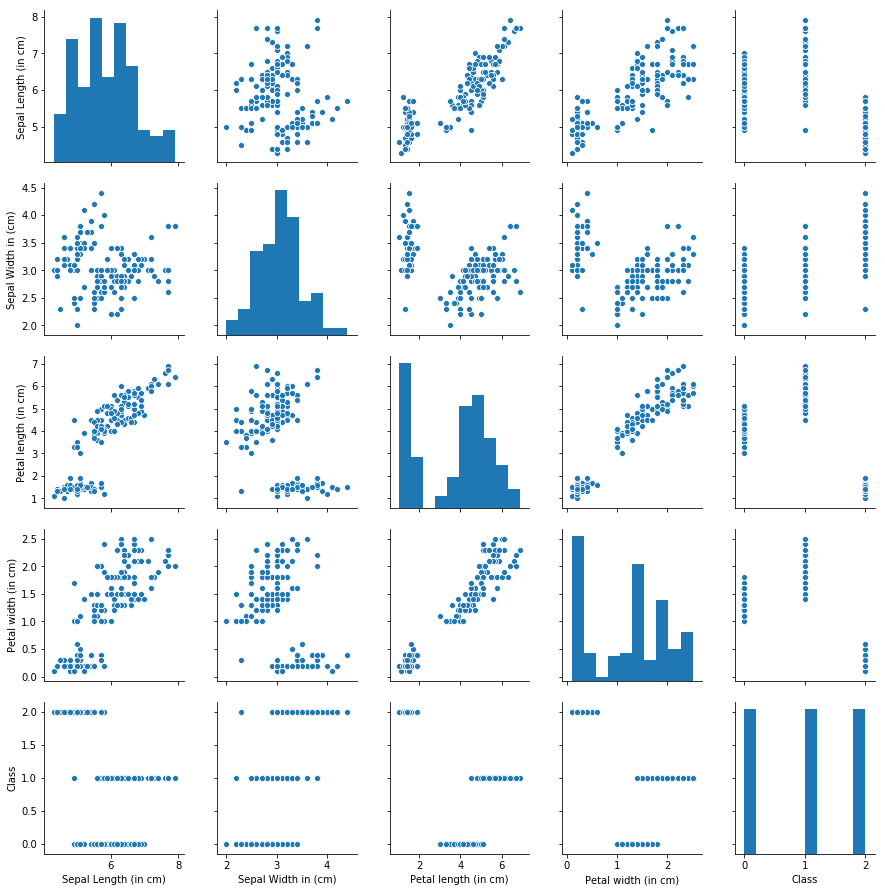

In [294]:
import seaborn as sns

iris_df_attr = iris_df.iloc[:,0:5]

sns.pairplot(iris_df_attr)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [295]:
X = iris_df.drop('Class', axis=1)
y = iris_df[['Class']]

In [296]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [297]:
# Apply scaling on X_train and X_test
# No need to apply scaling on Y, as it is a classification problem (target is a class)
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)    # Same scaling for test data

In [298]:
# Build K model
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [299]:
# with k = 3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Pridict on test data
y_pred = classifier.predict(X_test)  

# Find accuracy
accuracy_score(y_test, y_pred)

0.8666666666666667

In [300]:
# with k = 5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Pridict on test data
y_pred = classifier.predict(X_test)  

# Find accuracy
accuracy_score(y_test, y_pred)

0.8666666666666667

In [301]:
# with k = 9
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

# Pridict on test data
y_pred = classifier.predict(X_test)  

# Find accuracy
accuracy_score(y_test, y_pred)

0.9

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [302]:
# create empty array to store the varlue of misclassification error
error = []
y_test_np=np.asarray(y_test)

# Calculating error for K values of 1,3,5...19
for i in range(1, 19, 2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    iter_acc=accuracy_score(y_test,pred_i)
    # error.append(np.mean(pred_i != y_test_np))
    misClaErr = 1 - iter_acc
    error.append(misClaErr)
    print("Misclassification error at K = ", i, " is ", misClaErr)

Misclassification error at K =  1  is  0.09999999999999998
Misclassification error at K =  3  is  0.1333333333333333
Misclassification error at K =  5  is  0.1333333333333333
Misclassification error at K =  7  is  0.06666666666666665
Misclassification error at K =  9  is  0.09999999999999998
Misclassification error at K =  11  is  0.09999999999999998
Misclassification error at K =  13  is  0.1333333333333333
Misclassification error at K =  15  is  0.1333333333333333
Misclassification error at K =  17  is  0.1333333333333333


In [303]:
error

[0.09999999999999998,
 0.1333333333333333,
 0.1333333333333333,
 0.06666666666666665,
 0.09999999999999998,
 0.09999999999999998,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333]

<HTML>
    <BODY>
        <font color="red">
            As the Misclassification error gets minimum at K value of 7, therefore, the optimal value of K is 7
        </font>
    </BODY>
</HTML>

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Misclassification error')

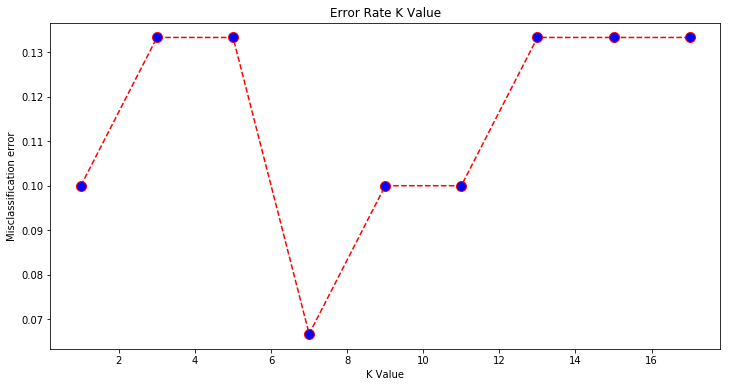

In [304]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 19, 2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Misclassification error')

# Naive Bayes with Iris Data

In [305]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

<HTML>
    <BODY>
        <font color="red">
            There is no column named as 'Species'. Therefore, we would consider column 'Class' instead.
        </font>
    </BODY>
</HTML>

In [306]:
X = iris_df.drop('Class', axis=1)
y = iris_df[['Class']]

In [307]:
#Check the dataset
print(y)
print(X)

     Class
0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
..     ...
120      1
121      1
122      1
123      1
124      1
125      1
126      1
127      1
128      1
129      1
130      1
131      1
132      1
133      1
134      1
135      1
136      1
137      1
138      1
139      1
140      1
141      1
142      1
143      1
144      1
145      1
146      1
147      1
148      1
149      1

[150 rows x 1 columns]
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3     

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [308]:
y.describe()

,Class
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


Class 0 = Iris-versicolor
Class 1 = Iris-virginica
Class 2 = Iris-setosa


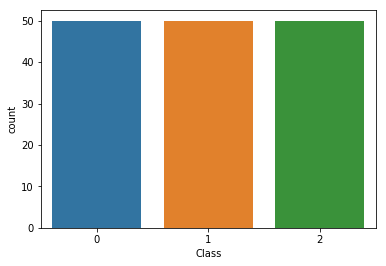

In [309]:
# import seaborn as sns

# y['Class'] = y['Class'].replace({0: 'Iris-versicolor', 1: 'Iris-virginica', 2: 'Iris-setosa'})

sns.countplot(x='Class', data=y)

print('Class 0 = Iris-versicolor')
print('Class 1 = Iris-virginica')
print('Class 2 = Iris-setosa')

In [310]:
#Drop Id variable from data

iris_df.columns.values

array(['Sepal Length (in cm)', 'Sepal Width in (cm)',
       'Petal length (in cm)', 'Petal width (in cm)', 'Class'],
      dtype=object)

<HTML>
    <BODY>
        <font color="red">
            Cannot see a column explicitely named as 'Id'. Not sure how to drop the index of rows, or, if that is even possible.
        </font>
    </BODY>
</HTML>

### Question 12 
Find Correlation among all variables and give your insights 

In [311]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

correlation = iris_df.corr()

# print('Correlation of Class with different features is:')
# correlation.iloc[0:4, 4]

correlation

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,-0.460039
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,0.612165
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,-0.649101
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,-0.580749
Class,-0.460039,0.612165,-0.649101,-0.580749,1.000000


<html> <font color = Darkblue>
    <table>
        <head>
            <th><tr><th>Relation between</th><th>Insight (as per available training data)</th><th>Comment</th></tr></th>
        </head>
        <body>
            <tr>
                <td>Sepal_length vs Sepal_width</td>
                <td>Negative correlation. Low correlation</td>
                <td></td>
            </tr>
            <tr>
                <td>Sepal_length vs Petal_length</td>
                <td>Positive correlation. High correlation</td>
                <td></td>
            </tr>
            <tr>
                <td>Sepal_length vs Petal_width</td>
                <td>Positive correlation. High correlation</td>
                <td></td>
            </tr>
            <tr>
                <td>Sepal_length vs Class</td>
                <td>Negative correlation</td>
                <td>Class is nominal. Therefore, not a valid insight.</td>
            </tr>
            <tr>
                <td>Sepal_width vs Petal_length</td>
                <td>Negative correlation</td>
                <td></td>
            </tr>
            <tr>
                <td>Sepal_width vs Petal_width</td>
                <td>Negative correlation</td>
                <td></td>
            </tr>
            <tr>
                <td>Sepal_width vs Class</td>
                <td>Positive correlation</td>
                <td>Class is nominal. Therefore, not a valid insight.</td>
            </tr>
            <tr>
                <td>Petal_length vs Petal_width</td>
                <td>Positive correlation. High correlation.</td>
                <td></td>
            </tr>
            <tr>
                <td>Petal_length vs Class</td>
                <td>Negative correlation</td>
                <td>Class is nominal. Therefore, not a valid insight.</td>
            </tr>
            <tr>
                <td>Petal_width vs Class</td>
                <td>Negative correlation</td>
                <td>Class is nominal. Therefore, not a valid insight.</td>
            </tr>
        </body>
    </table>
</font>
</html>

### Split data in Training and test set in 80:20.

In [312]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

### Question 13 
Do Feature Scaling 

In [313]:
# Use StandardScaler or similar methods

In [314]:
# Apply scaling on X_train and X_test
# No need to apply scaling on Y, as it is a classification problem (target is a class)

#from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)    # Same scaling for test data

### Question 14 
Train and Fit NaiveBayes Model

In [315]:
#Fit the model

from sklearn.naive_bayes import GaussianNB

iris_GNB = GaussianNB()
iris_GNB = iris_GNB.fit(X_train, y_train)

In [316]:
#Predict

y_pred_GNB=iris_GNB.predict(X_test)

y_pred_GNB

array([1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [317]:
# Print accuracy

#from sklearn.metrics import accuracy_score

print("The accuracy score of the model on the provided test data set is: ", accuracy_score(y_test, y_pred_GNB))

The accuracy score of the model on the provided test data set is:  0.8333333333333334


In [318]:
# show Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[9 3 0]
 [2 9 0]
 [0 0 7]]


In [319]:
#Show precision and Recall metrics

In [320]:
# Recall = True positive for x / (True positive for x + False positives for x)
# Precision = True positive for x / (True positive for x + True negatives for x)
# True or False is used to represent the predicted target value
# Positive or negative is used to represent the actual target value

recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1)
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)

rec_pre_mat = pd.DataFrame([recall, precision], 
                           columns=['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], 
                           index=['Recall', 'Precision'])

print("The recall-precision for the various classes is as shown below: ")
rec_pre_mat

The recall-precision for the various classes is as shown below: 


,Iris-versicolor,Iris-virginica,Iris-setosa
Recall,0.750000,0.818182,1.0
Precision,0.818182,0.750000,1.0
